# **Data Mining Project**

Below is the implementation of CMPE 255 project analysing the California Real Estate Data, the first step of which is loading the required packages and the dataset.

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesRegressor
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
from mlxtend.preprocessing import TransactionEncoder

file_path = 'RealEstate_California.csv'
data = pd.read_csv(file_path)
data.head()


,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,0,95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,4,94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County


Now we first perform basic Data Cleaning operations, like dropping missing values, dropping duplicates and making the data consistent

In [44]:
data = data.dropna()
data = data.drop_duplicates()
data['city'] = data['city'].str.lower()

Visualization of price distribution

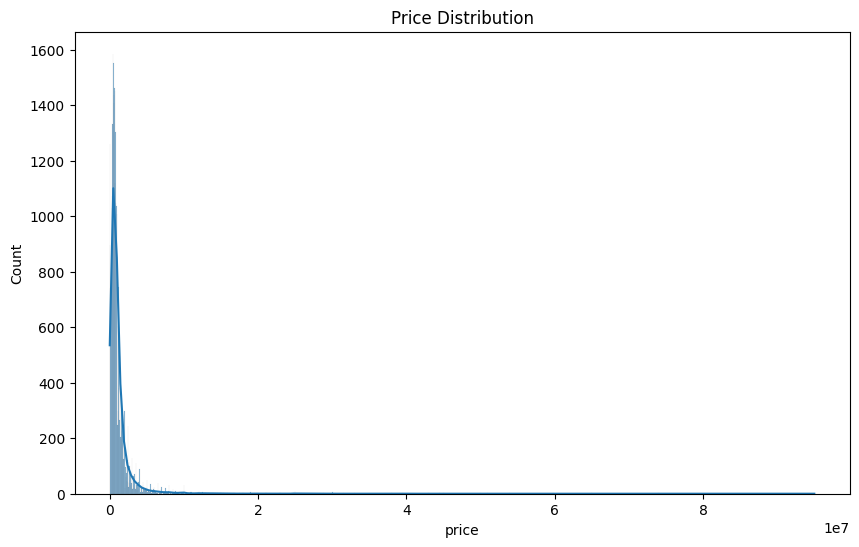

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Price Distribution')
plt.show()


Calculating summary statistics, for better understanding of data

In [46]:
data.describe()


,Unnamed: 0,stateId,countyId,cityId,is_bankOwned,is_forAuction,time,price,pricePerSquareFoot,yearBuilt,...,bathrooms,bedrooms,buildingArea,parking,garageSpaces,hasGarage,pool,spa,isNewConstruction,hasPetsAllowed
count,34815.000000,34815.0,34815.000000,34815.000000,34815.000000,34815.000000,3.481500e+04,3.481500e+04,3.481500e+04,34815.000000,...,34815.000000,34815.000000,3.481500e+04,34815.000000,34815.000000,34815.000000,34815.000000,34815.000000,34815.000000,34815.000000
mean,17691.711762,9.0,132281.905644,33987.381330,0.000086,0.000574,1.614728e+12,1.200978e+06,8.381060e+02,1638.323309,...,2.043343,2.649548,7.159502e+02,0.651845,1.013845,0.489444,0.114692,0.167141,0.013730,0.018096
std,10215.936346,0.0,95442.530294,53813.049403,0.009282,0.023961,6.806093e+10,2.580665e+06,2.204048e+04,745.734489,...,1.691812,2.022360,4.872685e+04,0.476392,1.473725,0.499896,0.318654,0.373107,0.116368,0.133299
min,0.000000,9.0,77.000000,0.000000,0.000000,0.000000,8.717760e+10,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8845.500000,9.0,51927.500000,12773.000000,0.000000,0.000000,1.624320e+12,4.100000e+05,1.890000e+02,1929.000000,...,1.000000,2.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17690.000000,9.0,111416.000000,25855.000000,0.000000,0.000000,1.625270e+12,6.990000e+05,3.770000e+02,1964.000000,...,2.000000,3.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26535.500000,9.0,213397.500000,44661.000000,0.000000,0.000000,1.625789e+12,1.200000e+06,5.930000e+02,1989.000000,...,3.000000,4.000000,0.000000e+00,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,35388.000000,9.0,333080.000000,781837.000000,1.000000,1.000000,1.626221e+12,9.500000e+07,2.100000e+06,9999.000000,...,58.000000,99.000000,9.061351e+06,1.000000,88.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Convert date to datetime, for Time-series analysis of property prices



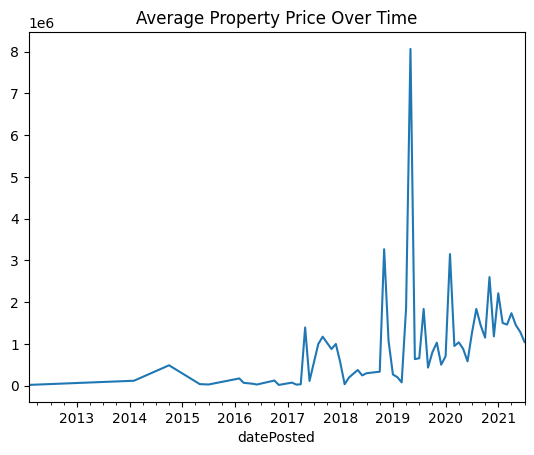

In [47]:
data['datePosted'] = pd.to_datetime(data['datePostedString'])
data.groupby(data['datePosted'].dt.to_period('M'))['price'].mean().plot(kind='line')
plt.title('Average Property Price Over Time')
plt.show()

Geospatial analysis of average price by county

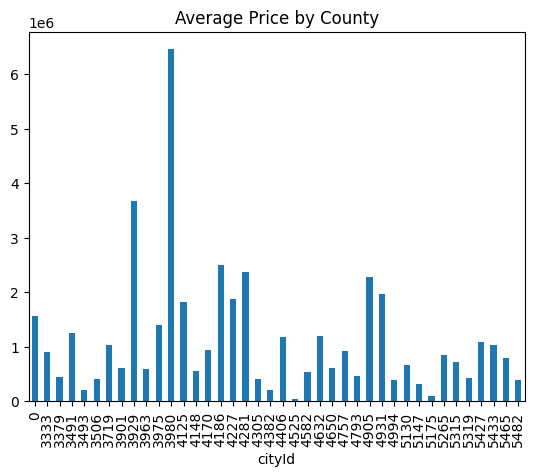

In [48]:
data.groupby('cityId')['price'].mean()[0:40].plot(kind='bar')
plt.title('Average Price by County')
plt.show()

Seelction specific features that are numeric and that are essential after applying the correlation matrix over it, using seaborn to to visualize the correlation matrix as a heatmap

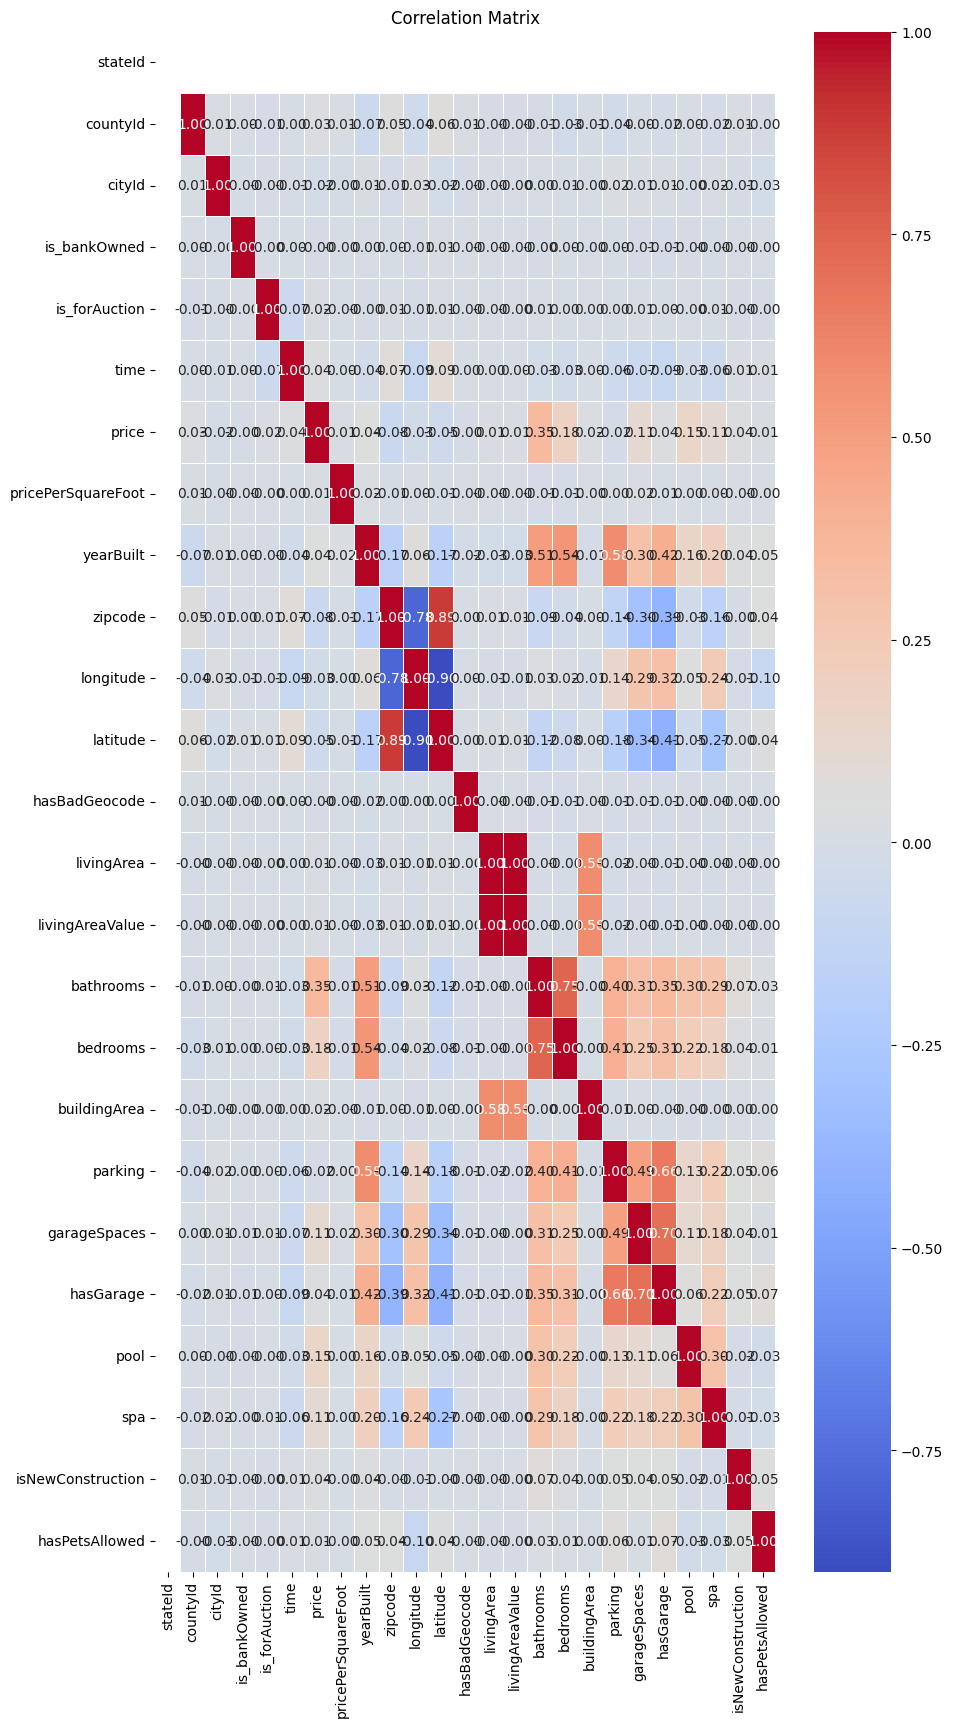

In [49]:
X = data.drop(['Unnamed: 0','datePosted','datePostedString','id','country','city','county','event','state','streetAddress','description','currency','lotAreaUnits','levels','homeType'], axis=1)
y = data['price']


df = pd.DataFrame(X)
correlation_matrix = df.corr()

plt.figure(figsize=(10, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Dropping 'price','longitude', 'yearBuilt','livingArea' fields after analysis of correlation matrix, and splitting the data into a test and train in the ratio of 0.3

In [50]:
X = data.drop(['price','longitude', 'yearBuilt','livingArea','Unnamed: 0','datePosted','datePostedString','id','country','city','county','event','state','streetAddress','description','currency','lotAreaUnits','levels','homeType'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Using Linear Regression model

In [51]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(f"RMSE: {mean_squared_error(y_test, predictions, squared=False)}")

RMSE: 4072503.3072270765


Using Gradient Boost Regression model

In [52]:
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.3, random_state=42)
gb_model.fit(X_train, y_train)

gb_predictions = gb_model.predict(X_test)
gb_rmse = mean_squared_error(y_test, gb_predictions, squared=False)

print(f"Gradient Boosting RMSE: {gb_rmse}")


Gradient Boosting RMSE: 1445831.0821703167


Using Random Forest model

In [53]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)

print(f"Random Forest RMSE: {rf_rmse}")

Random Forest RMSE: 1285006.107342037


Using MLP Regression model

In [54]:
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_regressor.fit(X_train, y_train)

y_pred = mlp_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred, squared=False)
print(f'MLP RMSE: {mse}')

MLP RMSE: 324733901.4728381


Using Extra Tree Regression model

In [55]:
extra_trees_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)
extra_trees_regressor.fit(X_train, y_train)

y_pred = extra_trees_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Extre Tree RMSE: {mse}')

Extre Tree RMSE: 1405234.7728155064


Since Random Forest gave the best RMSE, using GridSearchCV to analyse best parameters for Random Forest model

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 3, 5]
}


rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, predictions))
print(f"Best Model Parameters: {best_params}")
print(f"Best Model RMSE on Test Set: {rmse}")


Best Model Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Model RMSE on Test Set: 1397562.3859674856


Applying clustering methods to dataset, namely using PCA results along with K means, Agglomerative and DBScan

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


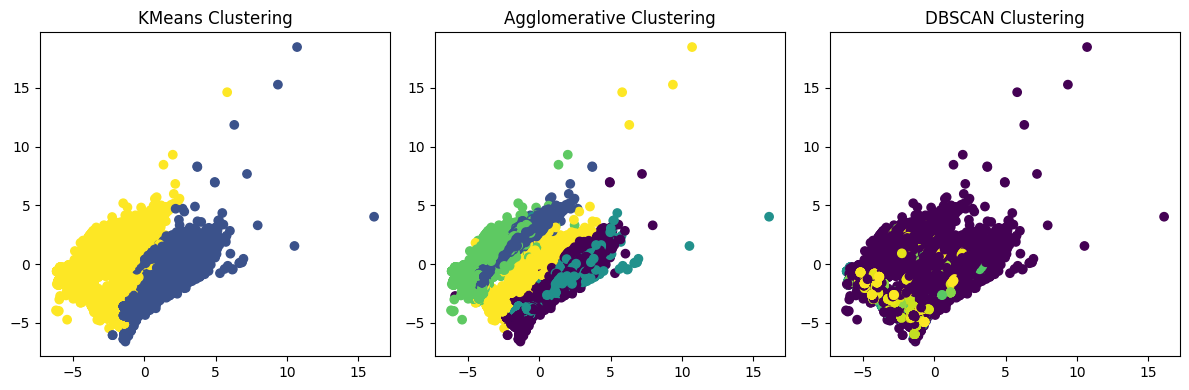

KMeans Cluster Analysis:
                     PC1       PC2  cluster_agg  cluster_dbscan
cluster_kmeans                                                 
0              -1.630587  2.262164     1.000000       55.333333
1               1.972563 -0.801093     1.087082      116.432411
2              -1.156022 -0.377649     4.000000       -1.000000
3               3.091766 -0.464190     0.000000       -1.000000
4              -2.049001  0.828618     2.022475      168.162138

Agglomerative Cluster Analysis:
                  PC1       PC2  cluster_kmeans  cluster_dbscan
cluster_agg                                                    
0            1.948612 -0.908563        1.110162      137.984820
1           -1.550186  1.972016        3.981423      126.805540
2            1.921440 -1.068436        1.056752      110.332107
3           -3.299855  0.312192        3.999356      198.760403
4           -0.897959 -0.741891        3.156883      177.223896

DBSCAN Cluster Analysis:
                    

In [12]:
# Standardize the data (important for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
n_components = 2  # You can choose the number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add cluster labels from KMeans to the PCA results
kmeans = KMeans(n_clusters=5, random_state=42)
principal_df['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

# Add cluster labels from Agglomerative Clustering to the PCA results
agg_clustering = AgglomerativeClustering(n_clusters=5)
principal_df['cluster_agg'] = agg_clustering.fit_predict(X_scaled)

# Add cluster labels from DBSCAN to the PCA results
dbscan = DBSCAN(eps=0.5, min_samples=5)
principal_df['cluster_dbscan'] = dbscan.fit_predict(X_scaled)

# Visualize the results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['cluster_kmeans'], cmap='viridis')
plt.title('KMeans Clustering')

plt.subplot(1, 3, 2)
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['cluster_agg'], cmap='viridis')
plt.title('Agglomerative Clustering')

plt.subplot(1, 3, 3)
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['cluster_dbscan'], cmap='viridis')
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

# Analyze the characteristics of each cluster
print("KMeans Cluster Analysis:")
print(principal_df.groupby('cluster_kmeans').mean())

print("\nAgglomerative Cluster Analysis:")
print(principal_df.groupby('cluster_agg').mean())

print("\nDBSCAN Cluster Analysis:")
print(principal_df.groupby('cluster_dbscan').mean())


Applying Apriori algorithm on a small batch

In [58]:
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
from mlxtend.preprocessing import TransactionEncoder

# Convert numerical columns to categorical
data['price_category'] = pd.cut(data['price'], bins=[0, 500000, 1000000, np.inf], labels=['Low', 'Medium', 'High'])
data['pricePerSquareFoot_category'] = pd.cut(data['pricePerSquareFoot'], bins=[0, 200, 400, np.inf], labels=['Low', 'Medium', 'High'])

selected_columns = ['parking','hasGarage','pool','spa','hasPetsAllowed']

# Get a subset of the data
subset_df = data[selected_columns]
te = TransactionEncoder()
te_ary = te.fit(subset_df).transform(subset_df)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm
frequent_itemsets = apriori(df[0:30], min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Print the rules

print("Rules: ",rules)
print("Frequent Item Sets: ",frequent_itemsets)

Rules:    antecedents consequents  antecedent support  consequent support  support  \
0         (s)         (a)            0.100000            0.133333      0.1   
1         (a)         (s)            0.133333            0.100000      0.1   

   confidence  lift  leverage  conviction  zhangs_metric  
0        1.00   7.5  0.086667         inf       0.962963  
1        0.75   7.5  0.086667         3.6       1.000000  
Frequent Item Sets:      support itemsets
0  0.133333      (a)
1  0.100000      (p)
2  0.100000      (s)
3  0.100000   (s, a)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
